In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Iris.csv')
Y = df.iloc[:,-1].values
df = df.iloc[:,1:-1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
labels = np.unique(Y)
Y = LabelEncoder().fit_transform(Y)

In [4]:
def PCA(X, dimensions = 2):
    X = X - np.tile(np.mean(X, 0), (X.shape[0], 1))
    _, eigenvectors = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, eigenvectors[:, :dimensions])
    return Y

In [5]:
df_normalized = MinMaxScaler().fit_transform(df.values)
df_standardized = StandardScaler().fit_transform(df.values)

In [6]:
pca = PCA(df.values)
pca_normalized = PCA(df_normalized)
pca_standardized = PCA(df_standardized)

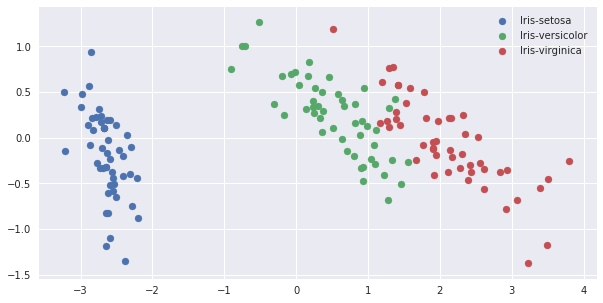

In [7]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(pca[Y==i,0], pca[Y==i,1], label=labels[no])
plt.legend()
plt.show()

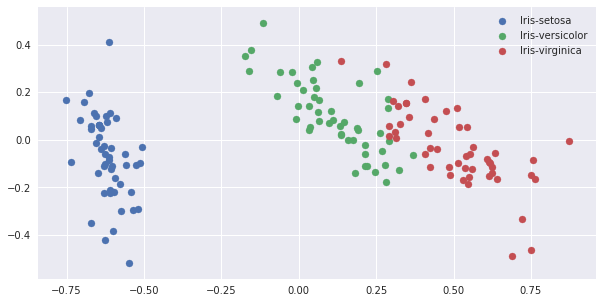

In [8]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(pca_normalized[Y==i,0], pca_normalized[Y==i,1], label=labels[no])
plt.legend()
plt.show()

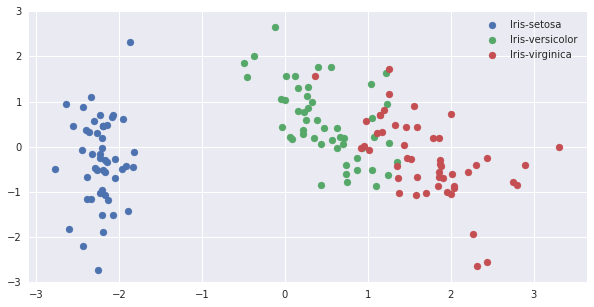

In [9]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(pca_standardized[Y==i,0], pca_standardized[Y==i,1], label=labels[no])
plt.legend()
plt.show()

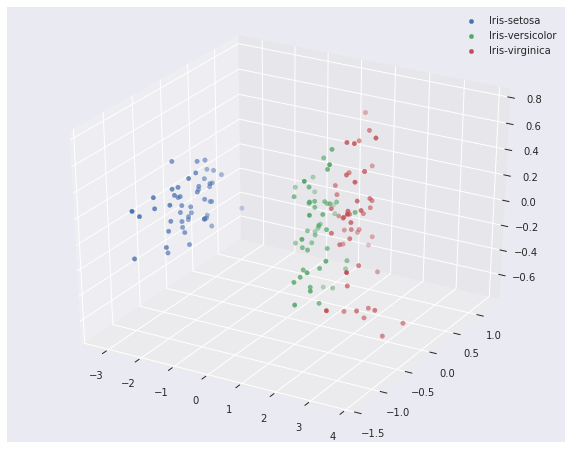

In [13]:
pca_3d = PCA(df.values, dimensions=3)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for no, i in enumerate(np.unique(Y)):
    ax.scatter(pca_3d[Y==i,0], pca_3d[Y==i,1], pca_3d[Y==i,2], label=labels[no])
plt.legend()
plt.show()